# Réseau de Hopfield : Modèle de la mémoire associative

Fait par : Amina Alioua, Anastasia Azmoudeh et Isabelle Wu


In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from collections import Counter

## Construction du modèle

In [2]:
# Variables globales
K = 25    # Nombre de neurones
N = 6     # Nombre de motifs
dt = 0.1  # Le pas de temps 
tm = np.arange(0,5,dt)  
T = len(tm)   # Nombre d'itérations

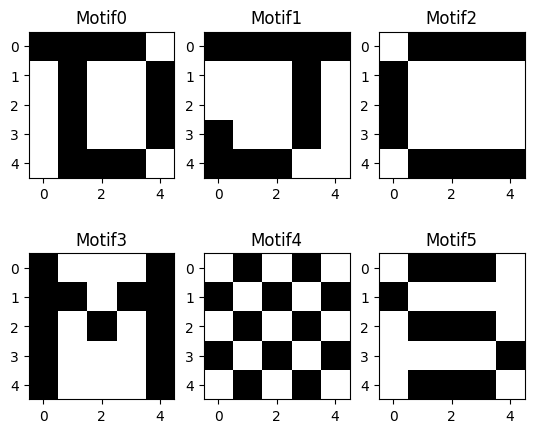

In [3]:
# Les 6 motifs fournis dans le sujet
motif1 = np.array([-1, -1, -1, -1, 1,
                  1, -1, 1, 1, -1,
                  1, -1, 1, 1, -1,
                  1, -1, 1, 1, -1,
                  1, -1, -1, -1, 1] ,dtype=float )

motif2= np.array ([-1, -1, -1, -1, -1,
                    1, 1, 1, -1, 1,
                    1, 1, 1, -1, 1,
                    -1, 1, 1, -1, 1,
                    -1, -1, -1, 1, 1], dtype=float )

motif3=  np.array([1, -1, -1, -1, -1,
                  -1, 1, 1, 1, 1,
                  -1, 1, 1, 1, 1,
                  -1, 1, 1, 1, 1,
                  1, -1, -1, -1, -1], dtype=float )

motif4= np.array([-1, 1, 1, 1, -1,
                -1, -1, 1, -1, -1,
                -1, 1, -1, 1, -1,
                -1, 1, 1, 1, -1,
                -1, 1, 1, 1, -1], dtype=float )

motif5= np.array( [1, -1, 1, -1, 1,
                  -1, 1, -1, 1, -1,
                  1, -1, 1, -1, 1,
                  -1, 1, -1, 1, -1,
                  1, -1, 1, -1, 1], dtype=float )

motif6= np.array(  [1, -1, -1, -1, 1,
                    -1, 1, 1, 1, 1,
                    1, -1, -1, -1, 1,
                    1, 1, 1, 1, -1,
                    1, -1, -1, -1, 1], dtype=float )

liste_motif = [motif1,motif2,motif3,motif4,motif5,motif6]


# Affichage des 6 motifs
col = 3
lig = 2
fig = plt.figure()
spec = mpl.gridspec.GridSpec(ncols=col, nrows=lig,hspace=0.5)

for i in range(lig):
    for j in range(col) :
        fig.add_subplot(spec[i,j])
        plt.title("Motif%d"%(i*col+j))
        plt.imshow(liste_motif[i*col+j].reshape((5,5)), cmap='gray')


In [4]:
# Fonctions nécessaire pour faire fonctionner le modèle
def app_W(list_y, K):
    """ Afin de stocker N motifs dans la mémoire, on fixe les poids synaptiques aux valeurs hebbiennes
    Input1 list_y : Liste contenant les motifs
    Input2 K : Nombre de neurones
    Output W : Matrices des poids synaptiques
    """
    W = np.zeros((K,K))
    nb_motifs = len(list_y)

    for i in range(K):
        # Etant donnee que les poids sont symétriques, on a besoin que de parcourir une moitié de la matrice
        for k in range(i,K):
            tmp = [y[k]*y[i] for y in list_y]
            tmp = (1/nb_motifs) * sum(tmp)
            W[i,k] = tmp
            W[k,i] = tmp
      
    return W


def ga(a):
    """ Tangente hyperbolique (a la place de sigmoide) --> fonction d'activation
    Input a : Activation
    Output res : Résultat de la fonction d'activation 
    """
    res = (np.exp(a) - np.exp(-a) )/(np.exp(a) + np.exp(-a))
    return res


def init_y(dt,deb,fin,K):
    """ Initialisation de y, une matrice de taille TxK
    Input1 dt : Le pas de temps
    Input2 deb : Temps début
    Input3 fin : Temps fin
    Input4 K : Nombre de neurones
    Output y : matrice de taille TxK initialiser a 0
    """
    tm=np.arange(deb,fin,dt)
    T=len(tm)
    y=np.zeros((T,K))

    return y


def fct_deriv(W,y,K,T,dt):
    """Pour chaque itération, on calcule l'etat de y
    Input1 W : Matrice de poids synaptiques
    Input2 y : Matrice à remplir
    Input3 K : Nombre de neurones
    Input4 T : Nombre d'iterations
    Input5 dt : Pas de temps
    Output y : Matrice contenant y 
    """
    # On parcourt à partir de 1 car 0 correspond au motif de depart
    for t in range(1, T):
        tmp = np.array([W[:, i] * (y[t-1,i]) for i in range(K)])
        tmp = np.sum(tmp, axis = 0)  # Somme les lignes
        y[t,:] = y[t-1] + (-y[t-1] + ga(tmp)) * dt

    return y

def error(K,ymotif,ymem):
    """Calcul l'erreur de précision de la mémoire a partir du motif correct et le motif memorise
    Input1 K : Nombre de neurone
    Input2 ymotif : Motif correct
    Input3 ymem : Motif memorise
    Output det : L'erreur
    """
    det = 0
    for i in range(K):
        det += np.abs(ymotif[i]-ymem[i])
    return 1/2 * det


## Simulation et analyse du modèle

Objectif : On cherche à déterminer la capacité de ce modèle de mémoire.

### Question 1

On teste avec N = 1, en faisant varier m de [0,K/2]. On fait une moyenne d'erreur avec nb_ite = 100 simulations pour chaque m.

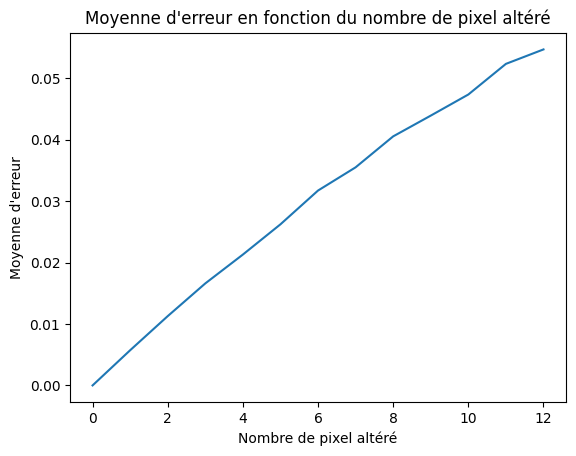

<Figure size 640x480 with 0 Axes>

In [5]:
# Variables globales
K = 25    # Nombre de neurones
N = 1     # Nombre de motifs
dt = 0.1  # Le pas de temps
tm = np.arange(0,5,dt)  
T = len(tm)   # Nombre d'itérations

# On fait apprendre au modele qu'un seul motif ici
W = app_W([motif1],K)

nb_ite = 100
liste_erreur = []

for m in range(int(K/2+1)): # Nombre de pixel modifie
    liste_erreur_tmp = []
    
    for i in range(nb_ite): # Nombre d'iterations pour chaque m
        # Initialisation de y avec comme image de depart le motif1
        y = init_y(dt,0,5,K)
        y[0] = np.array(motif1)
        
        # Liste de position random de pixel a change. On remplace 1 par -1 et inversement
        modifie = [random.randint(0,K-1) for i in range(m)]
        y[0][modifie] = np.where(y[0][modifie]==1,-1,1)
        
        # On "se rappelle" de l'image et on calcule le nombre d'erreur entre le motif originel et ce dont obtient avec l'algorithme
        y = fct_deriv(W,y,K,T,dt)
        liste_erreur_tmp.append(error(K, motif1,y[-1]))
        
    liste_erreur.append(sum(liste_erreur_tmp)/nb_ite)

    
# Affichage du graph d'erreur
plt.figure()
plt.plot(np.arange(0,int(K/2+1)), liste_erreur)
plt.title("Moyenne d'erreur en fonction du nombre de pixel altéré")
plt.xlabel("Nombre de pixel altéré")
plt.ylabel("Moyenne d'erreur")
plt.figure()
plt.show()


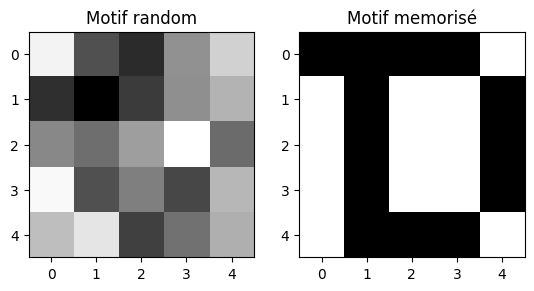

In [6]:
# Essai avec une image random
W = app_W([motif1],K)
y = init_y(dt,0,5,K)
y[0] = np.random.rand(K)
y = fct_deriv(W,y,K,T,dt)

# Affichage du motif vu et motif que le modele se rappelle 
plt.subplot(121)
plt.imshow(y[0].reshape((5,5)), cmap='gray')
plt.title('Motif random')

plt.subplot(122)
plt.imshow(y[-1].reshape((5,5)), cmap='gray')
plt.title('Motif memorisé')
plt.show()

### Question 2
Répéter la même procédure pour N = 2, . . . , 6

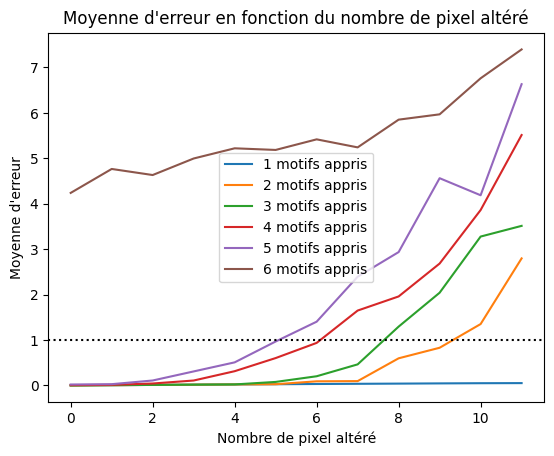

In [7]:
# Variables globales
K = 25    # Nombre de neurones
dt = 0.1  # Le pas de temps
tm = np.arange(0,5,dt)  
T = len(tm)   # Nombre d'itérations


pixels_alteres = int(K/2)
nb_ite = 100
liste_erreur_total = []     # Liste d'erreur qui va contenir les moyennes d'erreur pour chaque N en faisant varier m


for n in range(1,len(liste_motif)+1):
    # On fait varier le nombre de motifs à apprendre
    N = n                         # Nombre de motifs
    W = app_W(liste_motif[:n],K)
    liste_erreur_pour_N = []      # Liste d'erreur pour N motifs apprit
    
    
    for m in range(pixels_alteres):   # Nombre de pixel modifie
        liste_erreur_tmp = []     

        
        for i in range(nb_ite): # Nombre d'iterations pour chaque m
            # Initialisation de y avec comme image de depart un motif aleatoire dans la liste de motif
            y = init_y(dt,0,5,K)
            choix = np.random.randint(n)     # Choix d'un des motifs à se rappeler
            y[0] = np.array(liste_motif[choix])

            # Liste de position random de pixel a change. On remplace 1 par -1 et inversement
            modifie = [random.randint(0,K-1) for i in range(m)]
            y[0][modifie] = np.where(y[0][modifie]==1,-1,1)

            # On "se rappelle" de l'image et on calcule le nombre d'erreur entre le motif originel et ce dont obtient avec l'algorithme
            y = fct_deriv(W,y,K,T,dt)
            liste_erreur_tmp.append(error(K, liste_motif[choix],y[-1]))

        liste_erreur_pour_N.append(sum(liste_erreur_tmp)/nb_ite)
        
    liste_erreur_total.append(liste_erreur_pour_N)

    
# Affichage du graph d'erreur
plt.figure()
abscise = np.arange(0,pixels_alteres)
for l in range(len(liste_erreur_total)):
    plt.plot(abscise, liste_erreur_total[l], label = "%d motifs appris"%(l+1))
    
plt.title("Moyenne d'erreur en fonction du nombre de pixel altéré")
plt.xlabel("Nombre de pixel altéré")
plt.ylabel("Moyenne d'erreur")
plt.axhline(1, ls=':', color='k')
plt.legend()
plt.show()

### Question 3
On code une fonction permettant de créer des motifs random.

Pour les tests, on va faire varier le nombre d'images à apprendre à des modèles avec différent K. On augmente le nombre d'images à apprendre au modele tant que l'erreur est < 1 pour chercher le Nmax du réseau.

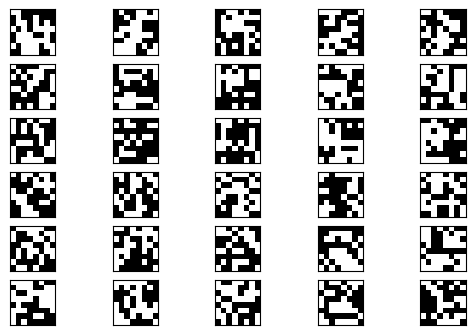

In [8]:

def create_motifs(K,nb):
    """ Creation de nb motifs alétoires pour K neurones
    Input1 K : Nombre de neurones
    Input2 nb : Nombre de motifs a creer
    Ouput list_motifs : Liste d'image
    """
    list_motifs = []
    for i in range(nb):
        list_motifs.append(np.array([random.choice([-1,1]) for i in range(K)],dtype='float'))
    return list_motifs


def aff_motif(list_motifs):
    """ Affichage des motifs en les dimensionnant
    Input list_motifs : Liste contenant les images
    """
    nb_motif = len(list_motifs)
    # Affichage minimiser
    col = min(nb_motif, 5)
    lig = max(1,nb_motif//5+1)
    fig = plt.figure()
    spec = mpl.gridspec.GridSpec(ncols=col, nrows=lig)
    
    # On a des images de meme dimension carre
    dim = int(math.sqrt(len(list_motifs[0])))
    # Compteur d'image
    cpt = 0
    for i in range(lig):
        for j in range(col) :
            if nb_motif == cpt :
                break
            fig.add_subplot(spec[i,j])
            plt.imshow(list_motifs[i*col+j].reshape((dim,dim)), cmap='gray')
            # Suppresion des valeurs des deux axes
            plt.gca().get_xaxis().set_visible(False)
            plt.gca().get_yaxis().set_visible(False)
            cpt += 1
    plt.show()

liste_im = create_motifs(64, 30)
aff_motif(liste_im)

In [13]:
# Variables globales
liste_K = np.arange(3,10)
liste_K = liste_K*liste_K  # On a des motifs carres
dt = 0.1  # Le pas de temps
tm = np.arange(0,5,dt)  
T = len(tm)   # Nombre d'itération

nb_ite = 100        # Nombre de fois qu'on va calculer Nmax pour un K donné
liste_Nmax = []     # Liste contenant les Nmax gardés pour chaque K, avec un Nmax avec une erreur <1 

# On fait varier le nombre de neurones
for K in liste_K:
    print("K =", K)
    
    liste_Nmax_tmp = []
    
    
    for j in range(nb_ite):
        # On fait varier le nombre de motif à apprendre
        N = 0     # Nombre de motif
        erreur = 0
        # On continue a augmente le nombre de motif a apprendre tant le l'erreur est inferieur a 1
        while erreur < 1:
            N += 1
            # Creation d'une liste de motif random
            liste_motif_random = create_motifs(K,N)
            W = app_W(liste_motif_random,K)

            liste_erreur_tmp = []
            # Memorisation de toute les images de la liste random
            for i in range(len(liste_motif_random)): 
                # Initialisation de y avec comme image de depart un motif de la liste de motif
                y = init_y(dt,0,5,K)
                y[0] = np.array(liste_motif_random[i])

                # On "se rappelle" de l'image et on calcule le nombre d'erreur entre le motif originel et ce dont obtient avec l'algorithme
                y = fct_deriv(W,y,K,T,dt)
                liste_erreur_tmp.append(error(K, y[0],y[-1]))

            erreur = sum(liste_erreur_tmp)/len(liste_erreur_tmp)
            #print("    N = %d avec une erreur "%(N), erreur)
        
        # On prend le dernier N ayant moins une erreur < 1
        liste_Nmax_tmp.append(N-1)
    


      
    # On prend le meilleur Nmax ayant au moins 3 occurences parmi toute les simulations
    res = 0
    x = Counter(liste_Nmax_tmp)
    for i in range(len(x)):
        if x[max(x)] < 3 :
            x.pop(max(x))
        else :
            res = max(x)
            break
    
    print("   ",Counter(liste_Nmax_tmp), 'Moyenne =', sum(liste_Nmax_tmp)/len(liste_Nmax_tmp)," Max =",max(liste_Nmax_tmp), " On prend Nmax =", res)
    liste_Nmax.append(res)
        

K = 9
    Counter({4: 30, 3: 30, 5: 22, 2: 13, 6: 5}) Moyenne = 3.76  Max = 6  On prend Nmax = 6
K = 16
    Counter({5: 33, 4: 27, 6: 21, 3: 13, 7: 4, 2: 2}) Moyenne = 4.7  Max = 7  On prend Nmax = 7
K = 25
    Counter({6: 34, 5: 25, 7: 24, 8: 13, 4: 2, 3: 1, 2: 1}) Moyenne = 6.14  Max = 8  On prend Nmax = 8
K = 36
    Counter({7: 25, 8: 23, 6: 23, 9: 16, 5: 7, 10: 4, 4: 1, 11: 1}) Moyenne = 7.31  Max = 11  On prend Nmax = 10
K = 49
    Counter({9: 33, 7: 20, 8: 19, 10: 13, 11: 8, 12: 3, 6: 3, 5: 1}) Moyenne = 8.66  Max = 12  On prend Nmax = 12
K = 64
    Counter({11: 25, 12: 19, 9: 19, 10: 17, 8: 9, 13: 7, 6: 2, 15: 1, 7: 1}) Moyenne = 10.41  Max = 15  On prend Nmax = 13
K = 81
    Counter({13: 23, 12: 18, 14: 16, 11: 15, 15: 11, 10: 8, 8: 4, 7: 2, 9: 2, 16: 1}) Moyenne = 12.29  Max = 16  On prend Nmax = 15


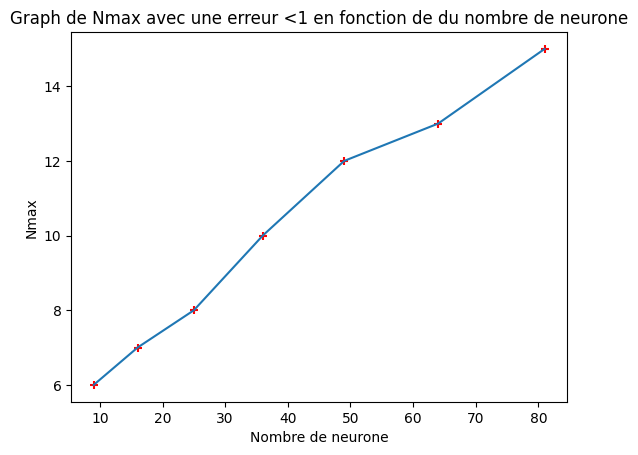

,K,Nmax,Capacité
0,9,6,0.666667
1,16,7,0.437500
2,25,8,0.320000
3,36,10,0.277778
4,49,12,0.244898
5,64,13,0.203125
6,81,15,0.185185


In [14]:
# Affichage du graph
plt.figure()
plt.plot(liste_K, liste_Nmax)
plt.scatter(liste_K, liste_Nmax, color = 'red', marker = "+") 
plt.title("Graph de Nmax avec une erreur <1 en fonction de du nombre de neurone")
plt.xlabel("Nombre de neurone")
plt.ylabel("Nmax")
plt.show()

# Affichage d'un dataframe
liste_capacite = [n/k for n,k in zip(liste_Nmax,liste_K)]
d = {'K':liste_K, 'Nmax':liste_Nmax,'Capacité':liste_capacite}
df = pd.DataFrame(data=d)
df